<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/NaiveBayesFromOfflineDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
import numpy as np, pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report




w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [181]:
#importing dataset
dataset = pd.read_csv('/content/Errors.csv')
#dataset = pd.read_csv('/content/fruitsBi.csv')
col_list = ['id', 'label', 'Description']
df = pd.read_csv("/content/Errors.csv", usecols=col_list)

In [182]:
import spacy

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load('en', disable=['parser', 'ner'])
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) 
import string  

#Removing punctuationes and those characters
def remove_punctuations(text):
  for punctuation in string.punctuation:
      text = text.replace(punctuation, '')
  return text
# Lowering Text from DataFrame
def loweringText(text):
    text = text.lower()
    return text
#Remove stopwords : words that do not put as much significance or impact as other words in the description
def remove_StopWords(text):
  line = text.split()
  text = ""
  for word in line:
    if(word not in stop_words):
      text += word
      text += " "
  return text
#Implementing lemmatization words by word
def lemmatize(text):
  line = text.split()
  txt = ""
  for word in line:
    doc = nlp(word)
    for token in doc:
      txt += token.lemma_
      txt += " "
  return txt


df["Desc"] = df['Description'].apply(remove_punctuations).apply(loweringText).apply(remove_StopWords).apply(lemmatize)


Dat  = df['Desc']
Y = dataset['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [183]:
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(Dat)
word_count_vector.shape

(30, 37)

In [184]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

#Compute the TFIDF score for your documents

# count matrix 
count_vector=cv.transform(Dat) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)


In [185]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0]
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
froze,0.655474
long,0.534020
time,0.534020
anything,0.000000
operator,0.000000
please,0.000000
quite,0.000000
respond,0.000000
say,0.000000
screen,0.000000


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(Dat)



# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]), df.sort_values(by=["tfidf"],ascending=False)


In [187]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(Dat)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(Dat)
print(tfidf_vectorizer_vectors)

  (0, 32)	0.534019766926982
  (0, 15)	0.534019766926982
  (0, 10)	0.6554737043257369
  (1, 28)	0.5908813701023294
  (1, 27)	0.4823840376936422
  (1, 5)	0.6466566682903475
  (2, 20)	0.4180529506997261
  (2, 18)	0.5604180635017659
  (2, 9)	0.5604180635017659
  (2, 6)	0.44395373476648853
  (3, 20)	0.504766924685183
  (3, 6)	0.5360401380387354
  (3, 0)	0.6766618964854428
  (4, 33)	0.5731044583723914
  (4, 26)	0.8194823242716636
  (5, 33)	0.4950493439759583
  (5, 31)	0.8688648612005053
  (6, 25)	1.0
  (7, 20)	0.4307991614936282
  (7, 8)	0.6477093392553206
  (7, 6)	0.4574896466087619
  (7, 2)	0.4307991614936282
  (8, 28)	0.5613841911602119
  (8, 27)	0.4583031155345862
  (8, 4)	0.6890617129159669
  :	:
  (23, 13)	0.5761525788553147
  (23, 7)	0.435028322064302
  (23, 2)	0.38320591169586443
  (24, 20)	0.47583961143903386
  (24, 7)	0.5401892335636593
  (24, 6)	0.5053206114072578
  (24, 2)	0.47583961143903386
  (25, 35)	0.5547147094015178
  (25, 20)	0.36894733053116546
  (25, 14)	0.49458985557773

In [202]:
X_train, X_test, y_train, y_test = train_test_split(Dat, Y,test_size=0.4, random_state =0  )
#_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state =0  )

print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

print("\y_train:\n")
print(y_train.head())
print(y_train.shape)

print("\y_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

8                     black screen show 
14                   window please wait 
23    application make impossible close 
20                        wait 3 minute 
1                      blue screen show 
Name: Desc, dtype: object
(18,)

X_test:

2     can not move cursor 
28    weird screen appear 
13      operator say wait 
10     blue screen appear 
26        new screen show 
Name: Desc, dtype: object
(12,)
\y_train:

8                   Reset the PC
14                          Wait
23    Close task in Task Manager
20                          Wait
1                   Reset the PC
Name: label, dtype: object
(18,)
\y_test:

2     Reset the PC
28    Reset the PC
13            Wait
10    Reset the PC
26    Reset the PC
Name: label, dtype: object
(12,)


In [189]:
from sklearn import preprocessing
# Build the model
model = make_pipeline(TfidfVectorizer( stop_words='english'), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict the categories of the test data
y_pred = model.predict(X_test)
print(y_pred)

print(y_test)
print(model.score(X_test, y_test))



['Reset the PC' 'Reset the PC' 'Wait' 'Reset the PC' 'Reset the PC'
 'Close task in Task Manager' 'Reset the PC' 'Reset the PC' 'Wait'
 'Close task in Task Manager' 'Wait' 'Close task in Task Manager']
2                   Reset the PC
28                  Reset the PC
13                          Wait
10                  Reset the PC
26                  Reset the PC
24    Close task in Task Manager
27                  Reset the PC
11                  Reset the PC
17                          Wait
22    Close task in Task Manager
5                           Wait
16    Close task in Task Manager
Name: label, dtype: object
1.0


In [190]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Dat, Y, cv=8, verbose=1)
scores



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


array([1.  , 1.  , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [191]:

classes = unique_labels(y_test, y_pred)

print('classificaiton report 1\n')
print(classification_report(y_test,y_pred))
print("The accuracy is {}".format(accuracy_score(y_test, y_pred)))
#he accuracy is 0.7738980350504514
#The accuracy is 0.47058823529411764


classificaiton report 1

                            precision    recall  f1-score   support

Close task in Task Manager       1.00      1.00      1.00         3
              Reset the PC       1.00      1.00      1.00         6
                      Wait       1.00      1.00      1.00         3

                  accuracy                           1.00        12
                 macro avg       1.00      1.00      1.00        12
              weighted avg       1.00      1.00      1.00        12

The accuracy is 1.0


In [192]:
confusion_matrix(y_test, y_pred)
print(classes)


['Close task in Task Manager' 'Reset the PC' 'Wait']


Confusion Matrix 
[[3 0 0]
 [0 6 0]
 [0 0 3]]
                            precision    recall  f1-score   support

Close task in Task Manager       1.00      1.00      1.00         3
              Reset the PC       1.00      1.00      1.00         6
                      Wait       1.00      1.00      1.00         3

                  accuracy                           1.00        12
                 macro avg       1.00      1.00      1.00        12
              weighted avg       1.00      1.00      1.00        12



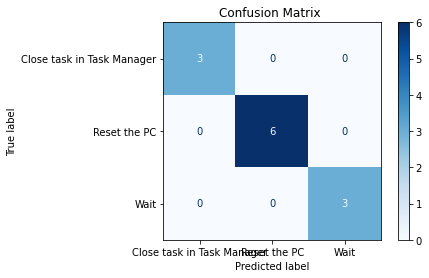

In [193]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
title = "Confusion Matrix "
disp = plot_confusion_matrix(model, X_test, y_test,
                              display_labels=classes,
                              cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)
print(classification_report(y_test, y_pred))


In [194]:
import pickle
# save the model to disk

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [195]:
#Random FOrest 
from sklearn import pipeline,ensemble,preprocessing,feature_extraction,metrics

clf=pipeline.Pipeline([
        ('tfidf_vectorizer', feature_extraction.text.TfidfVectorizer()),
        ('rf_classifier', ensemble.RandomForestClassifier(n_estimators=20,verbose=1,n_jobs=-1))
    ])

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
metrics.confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

print(clf.predict(["The application froze"]))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


                            precision    recall  f1-score   support

Close task in Task Manager       1.00      1.00      1.00         3
              Reset the PC       1.00      1.00      1.00         6
                      Wait       1.00      1.00      1.00         3

                  accuracy                           1.00        12
                 macro avg       1.00      1.00      1.00        12
              weighted avg       1.00      1.00      1.00        12

['Close task in Task Manager']


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.0s finished


In [196]:
#Decision Tree
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

Close task in Task Manager       1.00      1.00      1.00         3
              Reset the PC       1.00      1.00      1.00         6
                      Wait       1.00      1.00      1.00         3

                  accuracy                           1.00        12
                 macro avg       1.00      1.00      1.00        12
              weighted avg       1.00      1.00      1.00        12



In [198]:
# Now we are done with ML. 
# Let us work with DL.
#Keras


from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [214]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
        Dat, Y, test_size=0.25, random_state=0)

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [215]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', metrics=['accuracy'])
model.summary()
print(X_test)
print(y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                290       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
  (0, 5)	1
  (0, 16)	1
  (1, 21)	1
  (1, 28)	1
  (2, 20)	1
  (2, 27)	1
  (3, 4)	1
  (3, 21)	1
  (4, 21)	1
  (4, 22)	1
  (5, 1)	1
  (5, 5)	1
  (5, 6)	1
  (5, 16)	1
  (6, 9)	1
  (6, 13)	1
  (6, 26)	1
2                   Reset the PC
28                  Reset the PC
13                          Wait
10                  Reset the PC
26                  Reset the PC
24    Close task in Task Manager
27                  Reset the PC
11                  Reset the PC
Name: label, dtype: object


In [216]:
history = model.fit(X_train, y_train,
                  epochs=10,
                     verbose=False,
                    validation_data=(X_test, y_test), batch_size=10)

ValueError: ignored